In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image_dataset_from_directory  
# from tensorflow.keras.preprocessing import image
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #,confusion_matrix,classification_report,,recall_score,precision_score,f1_score


2024-05-06 23:21:21.530223: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 23:21:21.530325: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 23:21:21.665343: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
code={'س':0,'و':1,'ظ':2,'ط':3,'غ':4,'ف':5,'ا':6,'٣':7,'ض':8,'ث':9,'ذ':10,'٩':11,'ق':12,'١':13,'ش':14,'٤':15,'ص':16,'ب':17,'٥':18,'ت':19,'لا':20,'٠':21,'ي':22,'ج':23,'ح':24,'خ':25,'٧':26,'ز':27,'٨':28,'ه':29,'د':30,'٢':31,'ك':32,'م':33,'ر':34,'ل':35,'ن':36,'٦':37,'ع':38 }

def getname(n):
    for k,v in code.items():
        if v==n:
            return k

In [3]:
code.get('ل')

35

In [4]:
getname(5)

'ف'

# loading data

In [5]:
data=[]
data_y=[]

In [6]:
train_path='/kaggle/input/arabic-letters-numbers-ocr/Dataset/'
for folder in os.listdir(train_path):
    images=gb.glob(pathname=str(train_path  + folder +'/*.png'))
    print(folder)
    for img in images:
        img=cv2.imread(img,0)
        img=cv2.resize(img,(32,32))
        data.append(img)
        data_y.append(code[folder])

س
و
ظ
ط
غ
ف
ا
٣
ض
ث
ذ
٩
ق
١
ش
٤
ص
ب
٥
ت
لا
٠
ي
ج
ح
خ
٧
ز
٨
ه
د
٢
ك
م
ر
ل
ن
٦
ع


# show data sample

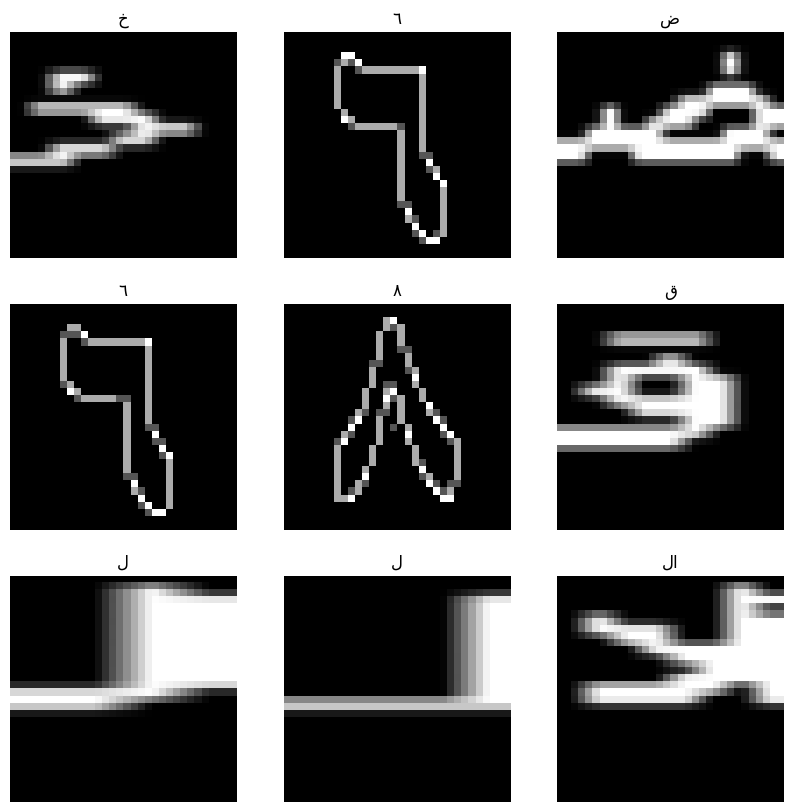

In [7]:
plt.figure(figsize=(10,10))
for i,v in enumerate(np.random.randint(0,len(data),9)):
    plt.subplot(3,3,i+1)
    plt.imshow(data[v],cmap="gray")
    plt.title(getname(data_y[v]))
    plt.axis('off')

# split data train test val

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, random_state=42)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [10]:
print(len(X_train) , len(X_test),len(X_val))

58049 19350 19350


In [11]:
X_train[1].shape

(32, 32)

convert data to np.array

In [12]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_val=np.array(X_val)
y_val=np.array(y_val)


In [13]:
X_test=np.array(X_test)
y_test=np.array(y_test)

# **defining functions**

# function predicting and evaluating a model with train data

In [14]:
def eval_model(model_n):
    
    y_probs_n=model_n.predict(X_test)
    y_pred_n=y_probs_n.argmax(axis=1)
    y_percent_n=np.amax(y_probs_n,axis=1)

    loss_n,accuracy_n=model_n.evaluate(X_val,y_val)
    print(f'validation loss= {loss_n}')
    print(f'validation accuracy= {accuracy_n}')

    accuracy_e_n=accuracy_score(y_test,y_pred_n)
    print(f'predictiong accuracy= {accuracy_e_n}')

# function showing a plot of the predicted results

In [15]:
def plot_model_pred(model_n):
    
    y_probs_n=model_n.predict(X_test)
    y_pred_n=y_probs_n.argmax(axis=1)
    y_percent_n=np.amax(y_probs_n,axis=1)

    
    plt.figure(figsize=(10,9))
    plotnumber=1

    for i in range(1,31):
        if plotnumber <=30:
            ax=plt.subplot(5,6,plotnumber)
            plt.imshow(X_test[i],cmap='gray')
            plt.axis('off')
            plt.title('Pred: ' + getname(y_pred_n[i]) +' '+ str(round(y_percent_n[i]*100)) +'% (True: ' + getname(y_test[i]) + ')',fontdict={'fontsize':10 , 'color':('green' if y_pred_n[i]==y_test[i] else 'red')})
            plotnumber+=1
    plt.tight_layout()
    plt.show()

# function evaluation and plooting results togther 

In [16]:
def plot_eval_model_pred(model_n):
    
    y_probs_n=model_n.predict(X_test)
    y_pred_n=y_probs_n.argmax(axis=1)
    y_percent_n=np.amax(y_probs_n,axis=1)
    
    
    loss_n,accuracy_n=model_n.evaluate(X_val,y_val)
    print(f'validation loss= {loss_n}')
    print(f'validation accuracy= {accuracy_n}')

    accuracy_e_n=accuracy_score(y_test,y_pred_n)
    print(f'predictiong accuracy= {accuracy_e_n}')
    
    plt.figure(figsize=(10,9))
    plotnumber=1

    for i in range(1,31):
        if plotnumber <=30:
            ax=plt.subplot(5,6,plotnumber)
            plt.imshow(X_test[i],cmap='gray')
            plt.axis('off')
            plt.title('Pred: ' + getname(y_pred_n[i]) +' '+ str(round(y_percent_n[i]*100)) +'% (True: ' + getname(y_test[i]) + ')',fontdict={'fontsize':10 , 'color':('green' if y_pred_n[i]==y_test[i] else 'red')})
            plotnumber+=1
    plt.tight_layout()
    plt.show()

# function predicting one image 

In [17]:
def pred_one_img(model_n,path):
    img_1=cv2.imread(path,0)
    img_1=cv2.resize(img_1,(32,32))
    img_1=np.array(img_1)
    img_1_3d=img_1.reshape((1, 32, 32))
    img_1_prob=model_n.predict(np.array(img_1_3d))
    img_1_pred=img_1_prob.argmax(axis=1)
    plt.imshow(img_1,cmap='gray')
    plt.axis('off')
    name_1=getname(img_1_pred)
    print(name_1)

# **creating model**

In [18]:
from tensorflow import keras
import tensorflow as tf

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(39, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 128)         8320      
                                                                 
 batch_normalization (Batch  (None, 9, 9, 128)         512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 9, 9, 256)         1024      
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 4, 256)         0         
 D)                                                              
                                                        

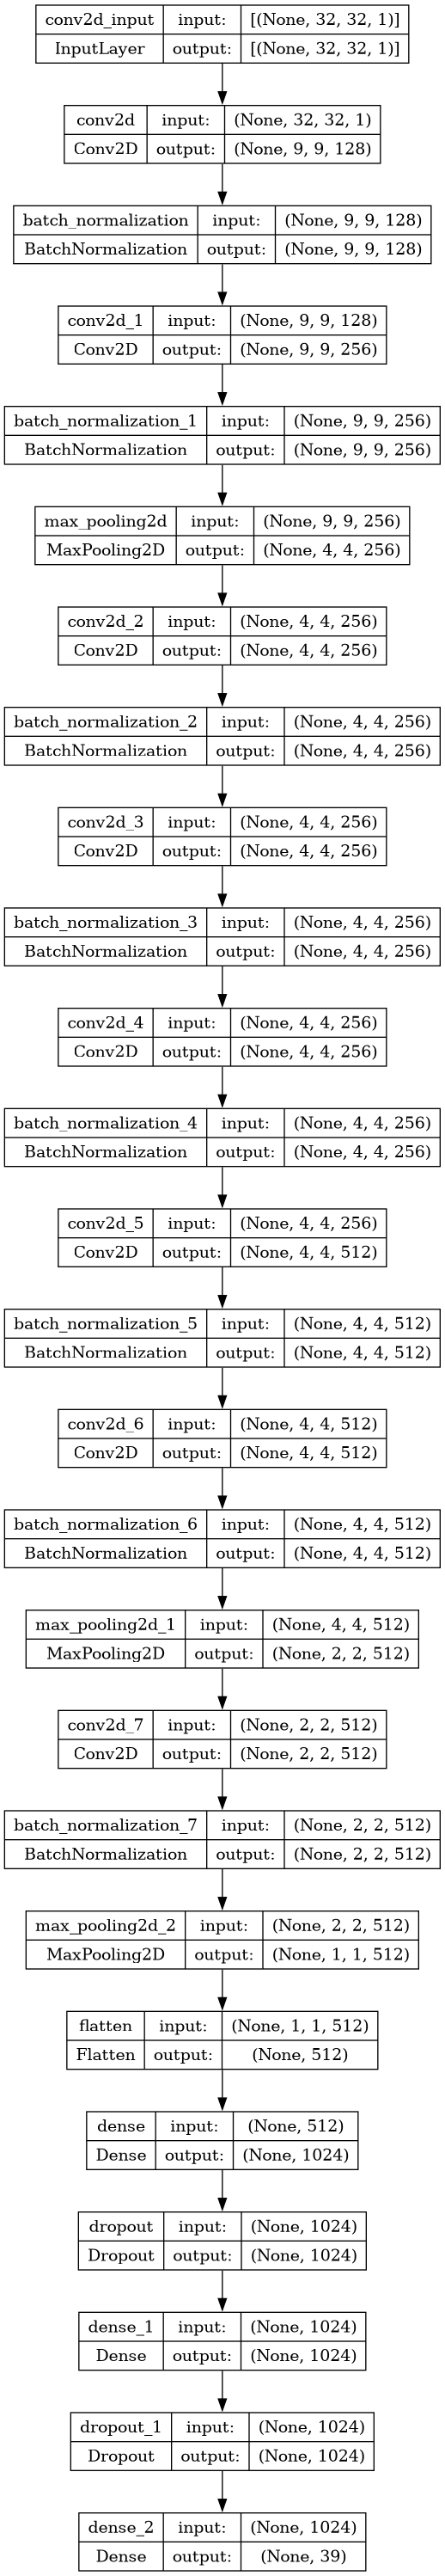

In [19]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [26]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=2)
history = model.fit(X_train,y_train,epochs=7,batch_size=16,verbose=1,validation_data =(X_val,y_val),callbacks=es)

Epoch 1/7
3629/3629 [==============================] - 55s 15ms/step - loss: 0.0321 - accuracy: 0.9913 - val_loss: 113.6413 - val_accuracy: 0.0252
Epoch 2/7
3629/3629 [==============================] - 54s 15ms/step - loss: 0.0278 - accuracy: 0.9929 - val_loss: 0.0242 - val_accuracy: 0.9931
Epoch 3/7
3629/3629 [==============================] - 55s 15ms/step - loss: 0.0188 - accuracy: 0.9952 - val_loss: 0.0181 - val_accuracy: 0.9953
Epoch 4/7
3629/3629 [==============================] - 55s 15ms/step - loss: 0.0132 - accuracy: 0.9968 - val_loss: 0.0496 - val_accuracy: 0.9841
Epoch 5/7
3629/3629 [==============================] - 55s 15ms/step - loss: 0.0131 - accuracy: 0.9967 - val_loss: 0.0257 - val_accuracy: 0.9932


# **Model accuracy**

605/605 [==============================] - 3s 5ms/step - loss: 0.0257 - accuracy: 0.9932
validation loss= 0.025669289752840996
validation accuracy= 0.9932299852371216
predictiong accuracy= 0.9937467700258398


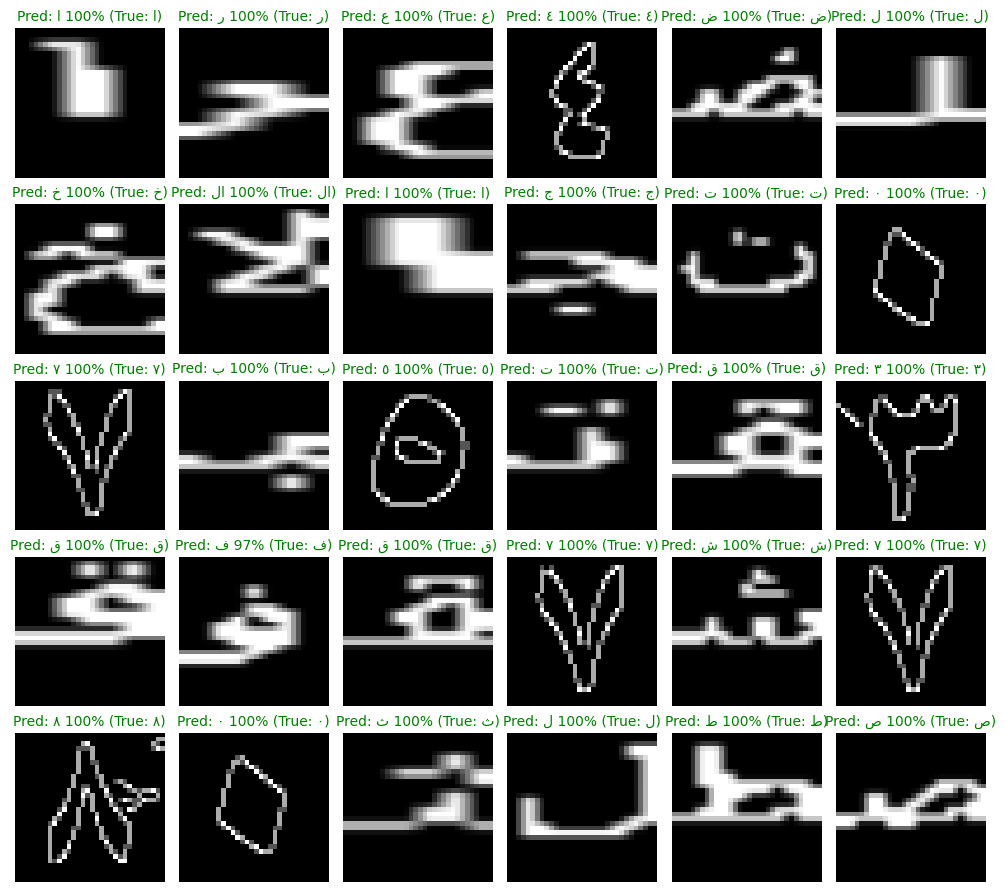

In [27]:
plot_eval_model_pred(model)

1/1 [==============================] - 0s 19ms/step
ا


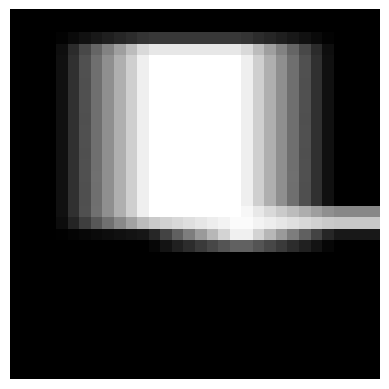

In [28]:
pred_one_img(model,'/kaggle/input/arabic-letters-numbers-ocr/Dataset/ا/100.png')

In [29]:
model.save("arabic-OCR.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)  # Pick class with highest probability

# Map predicted indices to characters
labels = {idx: getname(idx) for idx in np.unique(pred)}

# Convert predicted indices to characters
pred_characters = [labels[idx] for idx in pred]


605/605 [==============================] - 3s 4ms/step


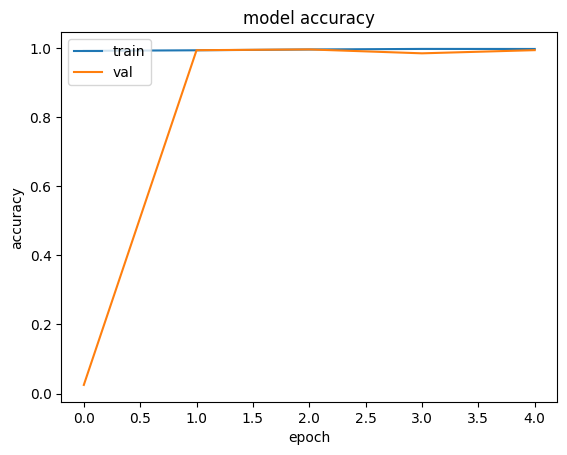

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

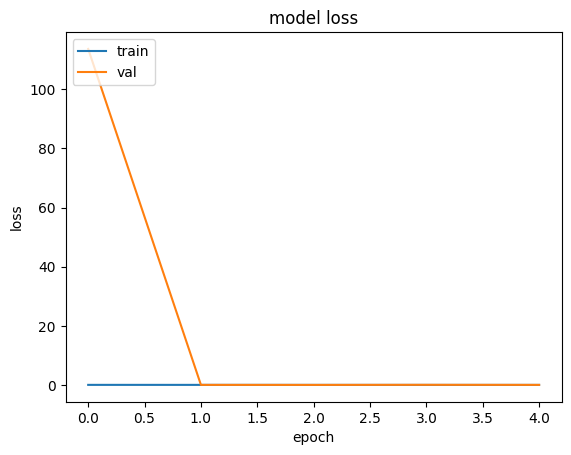

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()